## U shape PHP dynamics


We solve a set of governing equations: (Zhang et al., 2002)

1. Momentum equation:
 ## $\frac{\mathrm{d}^{2} X_{p}}{\mathrm{d} \tau^{2}}+32 \frac{\mathrm{d} X_{p}}{\mathrm{d} \tau}+\omega_{0}^{2} X_{p}=\wp\left(P_{1}-P_{2}\right)$
 
2. Perfect gas law combined with first law of thermodynamics:

 ## $M_{1}=P_{1}^{1 / \gamma}\left(1+X_{p}\right)$
 
 ## $M_{2}=P_{2}^{1 / \gamma}\left(1-X_{p}\right)$
 
 ## $\theta_{1}=P_{1}^{(\gamma-1) / \gamma}$
 
 ## $\theta_{2}=P_{2}^{(\gamma-1) / \gamma}$

3. The phase change relations between the mass of vapor and the heat transfer from the wall
 ## $\frac{\mathrm{d} M_{1}}{\mathrm{d} \tau}=\left\{\begin{array}{ll}
-H_{\mathrm{c}} X_{p}\left(\theta_{1}-\theta_{\mathrm{c}}\right), & X_{p}>0 \\
-H_{\mathrm{e}}\left(1+X_{p}\right)\left(\theta_{\mathrm{e}}-\theta_{1}\right), & X_{p}<0
\end{array}\right.$
 
 ## $\frac{\mathrm{d} M_{2}}{\mathrm{d} \tau}=\left\{\begin{array}{ll}
H_{\mathrm{e}}\left(1-X_{p}\right)\left(\theta_{\mathrm{e}}-\theta_{2}\right), & X_{p}>0 \\
H_{\mathrm{c}} X_{p}\left(\theta_{2}-\theta_{\mathrm{c}}\right), & X_{p}<0
\end{array}\right.$

 So there are 7 euqations for seven non-dimensional variables: 
 
 $X_p$, the dimensionless position of the left end of the liquid slug.
 
 $M_{1}$, the dimensionless mass of the left vapor plug.
 
 $M_{2}$, the dimensionless mass of the right vapor plug.
 
 $\theta_{1}$, the dimensionless temperature of the left vapor plug.
 
 $\theta_{2}$, the dimensionless temperature of the right vapor plug.
 
 $P_{1}$, the dimensionless static pressure of the left vapor plug.
 
 $P_{2}$, the dimensionless static pressure of the left vapor plug.
 
 
So how to solve them?

We actrually solve this system of ODE with four variables:

 ## $\frac{\mathrm{d} \textbf{U}}{\mathrm{d} \tau}=f(\textbf{U})$,
 
 where

 ## $\textbf{U}=\left(\begin{array}{c}  X_{p}  \\ \frac{\mathrm{d} X_{p}}{\mathrm{d} \tau} \\ M_{1} \\ M_{2} \end{array}\right)$.
 
 The details are as below: ( $\omega_{0}, \zeta, \theta_{\mathrm{e}}, \theta_{\mathrm{c}}, H_{\mathrm{c}}, H_{\mathrm{e}}$ are all known constant. $\tau$ is the dimensionless time, and $\gamma$ is the specific heat ratio。)
 
 ## $\begin{equation} \frac{\mathrm{d} \textbf{U}}{\mathrm{d} \tau}= \left(\begin{array}{c}  \frac{\mathrm{d} X_{p}}{\mathrm{d} \tau} \\ -32 \frac{\mathrm{d} X_{p}}{\mathrm{d} \tau} - \omega_{0}^2 X_{p} +\zeta (P_{1} - P_{2}) \\ -H_{\mathrm{c}} X_{p}\left(\theta_{1}-\theta_{\mathrm{c}}\right)  \\ H_{\mathrm{e}}\left(1-X_{p}\right)\left(\theta_{\mathrm{e}}-\theta_{2}\right) \end{array} \right) ,  X_{p}> 0 \end{equation} $
 
  ## $\begin{equation} \frac{\mathrm{d} \textbf{U}}{\mathrm{d} \tau}= \left(\begin{array}{c}  \frac{\mathrm{d} X_{p}}{\mathrm{d} \tau} \\ -32 \frac{\mathrm{d} X_{p}}{\mathrm{d} \tau} - \omega_{0}^2 X_{p} +\zeta (P_{1} - P_{2}) \\ -H_{\mathrm{e}}\left(1+X_{p}\right)\left(\theta_{\mathrm{e}}-\theta_{1}\right)  \\ H_{\mathrm{c}} X_{p}\left(\theta_{2}-\theta_{\mathrm{c}}\right) \end{array} \right) ,  X_{p}< 0 \end{equation} $
  
 where
 
 ## $P_{1} = (\frac{M_{1}}{1+X_{p}})^{\gamma}, P_{2} = (\frac{M_{2}}{1+X_{p}})^{\gamma}$
 
 ## $\theta_{1} = P_{1}^{\frac{\gamma-1}{\gamma}}, \theta_{2} = P_{2}^{\frac{\gamma-1}{\gamma}}$

 

In [1]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
using DifferentialEquations

In [3]:
using DelimitedFiles

## Parameters of the PHP

In [4]:
    ω0 = sqrt(1.2e004);
    ζ = 1.2e005;


    Θ = 0.15;
    θe = 1 + Θ;
    θc = 1 - Θ;
    
    He = 3000.0;
    Hc = 3000.0;
    
    X0 = 0.5;

    γ = 1.4;

## Set up the ODE equations

In [5]:
    p = (γ,Hc,He,θc,θe,ω0,ζ);

function php!(du,u,p,t)
    
    γ,Hc,He,θc,θe,ω0,ζ  = p
    
    P[1] = (u[3]/(1+u[1]))^(γ) 
    P[2] = (u[4]/(1-u[1]))^(γ) 
    θ[1] = P[1]^((γ-1)/γ)
    θ[2] = P[2]^((γ-1)/γ)
    
    du[1] = u[2]
    du[2] = -32*u[2] - (ω0^2)*u[1] + ζ*(P[1]-P[2])
    u[1] > 0 ? du[3] = -Hc*u[1]*(θ[1] - θc) : du[3] = He*(1 + u[1])*(θe - θ[1]) 
    u[1] > 0 ? du[4] = He*(1-u[1])*(θe - θ[2]) : du[4] = Hc*u[1]*(θ[2] - θc)
    
    return du
end

php! (generic function with 1 method)

## Initialization of the PHP

In [6]:
    X = X0;
    P = [1.0,1.0];
    θ = [1.0,1.0];
    
    # only good for one liquid slug
    M = zeros(size(θ))
    M[1] = P[1].^(1/γ).*(1 + X);
    M[2] = P[2].^(1/γ).*(1 - X);

## Solve the ODE equations

In [7]:
u0 =  [0.5,0.0,M[1],M[2]]
tspan = (0.0, 0.1);
prob = ODEProblem(php!, u0, tspan, p)
sol = solve(prob, RK4(), adaptive=false, dt=1.0e-6);

## Plot the ODE results

In [8]:
Xhist0000001=zeros(length(sol));
M1hist0000001=zeros(length(sol));
M2hist0000001=zeros(length(sol));
thist0000001=zeros(length(sol));

for i = 1:length(sol)
    Xhist0000001[i]=sol[i][1]
    M1hist0000001[i]=sol[i][3]
    M2hist0000001[i]=sol[i][4]
    thist0000001[i]=sol.t[i]
end

## Initialization of the PHP

In [9]:
    X = X0;
    P = [1.0,1.0];
    θ = [1.0,1.0];
    
    # only good for one liquid slug
    M = zeros(size(θ))
    M[1] = P[1].^(1/γ).*(1 + X);
    M[2] = P[2].^(1/γ).*(1 - X);

## Solve the ODE equations

In [10]:
u0 =  [0.5,0.0,M[1],M[2]]
tspan = (0.0, 0.1);
prob = ODEProblem(php!, u0, tspan, p)
sol = solve(prob, RK4(), adaptive=false, dt=1.0e-5);

## Plot the ODE results

In [11]:
Xhist000001=zeros(length(sol));
M1hist000001=zeros(length(sol));
M2hist000001=zeros(length(sol));
thist000001=zeros(length(sol));

for i = 1:length(sol)
    Xhist000001[i]=sol[i][1]
    M1hist000001[i]=sol[i][3]
    M2hist000001[i]=sol[i][4]
    thist000001[i]=sol.t[i]
end

## Initialization of the PHP

In [12]:
    X = X0;
    P = [1.0,1.0];
    θ = [1.0,1.0];
    
    # only good for one liquid slug
    M = zeros(size(θ))
    M[1] = P[1].^(1/γ).*(1 + X);
    M[2] = P[2].^(1/γ).*(1 - X);

## Solve the ODE equations

In [13]:
u0 =  [0.5,0.0,M[1],M[2]]
tspan = (0.0, 0.1);
prob = ODEProblem(php!, u0, tspan, p)
sol = solve(prob, RK4(), adaptive=false, dt=1.0e-4);

## Plot the ODE results

In [14]:
Xhist00001=zeros(length(sol));
M1hist00001=zeros(length(sol));
M2hist00001=zeros(length(sol));
thist00001=zeros(length(sol));

for i = 1:length(sol)
    Xhist00001[i]=sol[i][1]
    M1hist00001[i]=sol[i][3]
    M2hist00001[i]=sol[i][4]
    thist00001[i]=sol.t[i]
end

## Get data and compare

In [15]:
cd(dirname(pwd()))

cd("data")

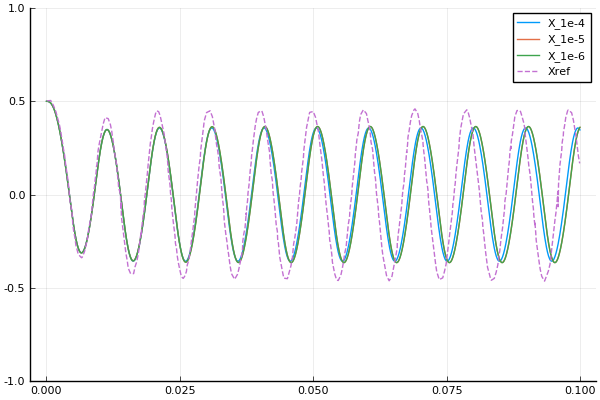

In [16]:
Xprefmatrix = readdlm("Xp.txt",Float64)
plot(thist00001,Xhist00001,label="X_1e-4")
plot!(thist000001,Xhist000001,label="X_1e-5")
plot!(thist0000001,Xhist0000001,label="X_1e-6")
plot!(Xprefmatrix[:,1],Xprefmatrix[:,2], line=:dash, label="Xref",ylim=(-1.0,1.0))

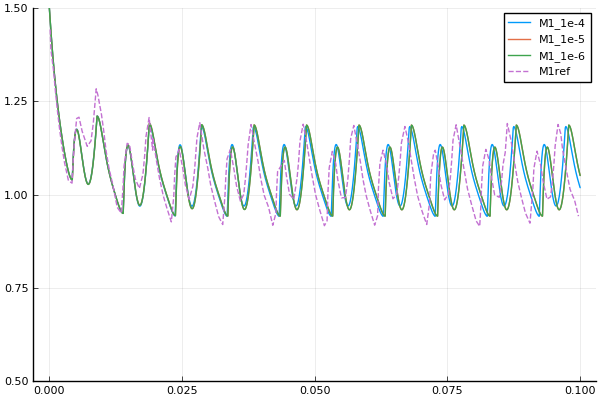

In [17]:
M1refmatrix = readdlm("M1.txt", ',', Float64)
plot(thist00001,M1hist00001,label="M1_1e-4")
plot!(thist000001,M1hist000001,label="M1_1e-5")
plot!(thist0000001,M1hist0000001,label="M1_1e-6")
plot!(M1refmatrix[:,1],M1refmatrix[:,2], line=:dash, label="M1ref",ylim=(0.5,1.5))

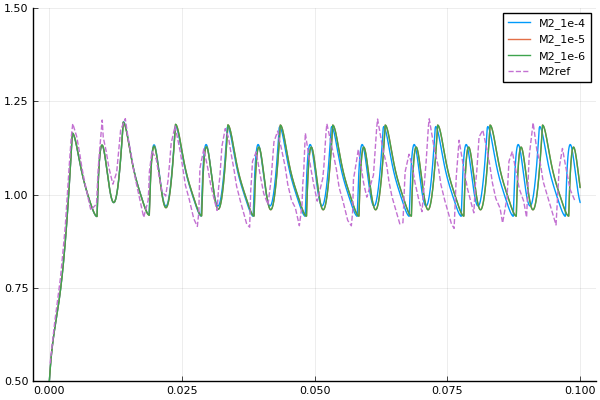

In [18]:
M2refmatrix = readdlm("M2.txt", ',', Float64)
plot(thist00001,M2hist00001,label="M2_1e-4")
plot!(thist000001,M2hist000001,label="M2_1e-5")
plot!(thist0000001,M2hist0000001,label="M2_1e-6")
plot!(M2refmatrix[:,1],M2refmatrix[:,2], line=:dash, label="M2ref",ylim=(0.5,1.5))